In [9]:
import numpy as np
import pandas as pd

In [10]:
EQE = pd.read_excel('dataset_ML.xlsx')

In [11]:
array = EQE.values
data = pd.DataFrame(array)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

##EDA

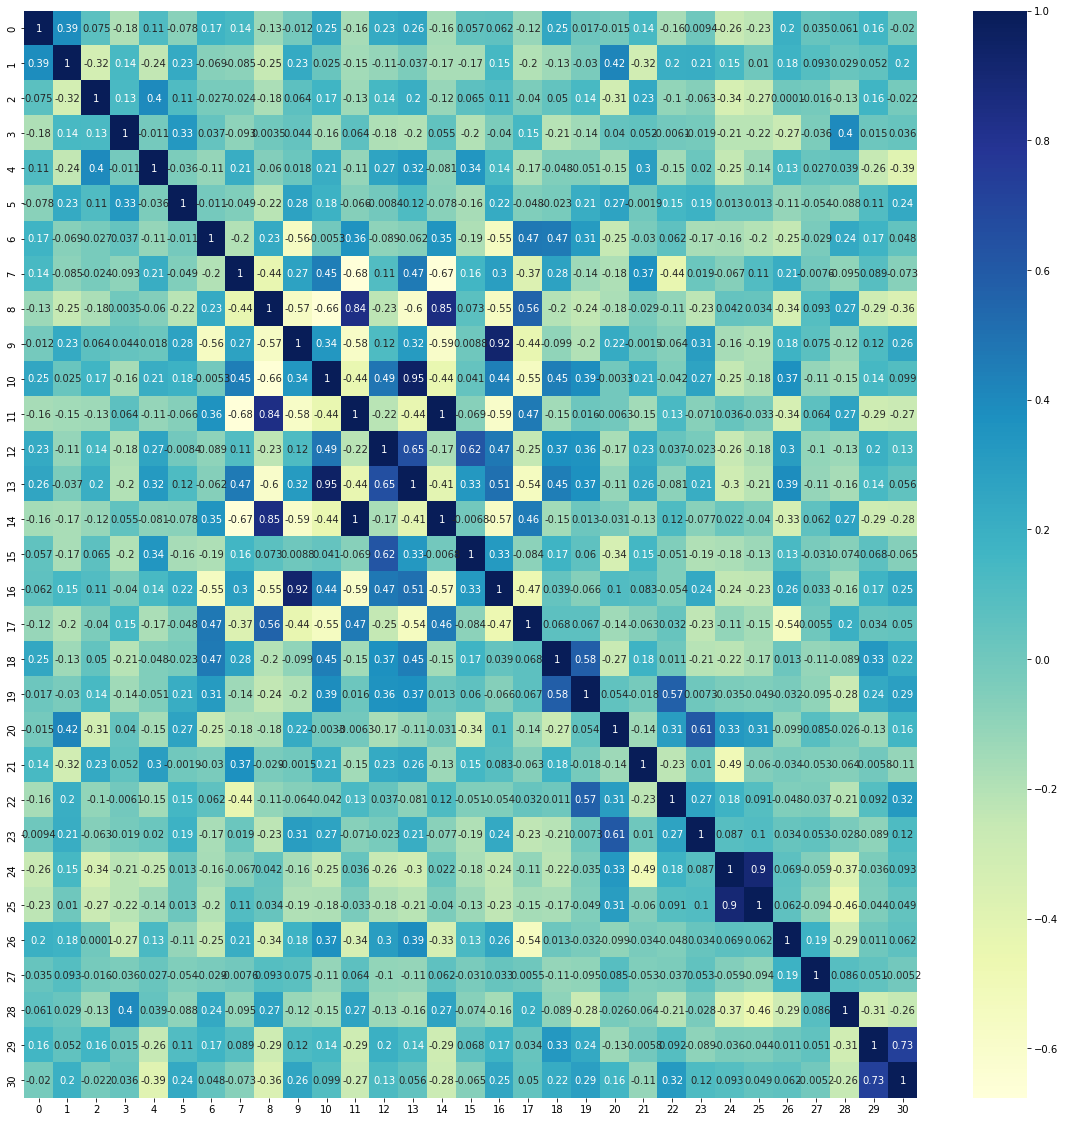

In [12]:
plt.figure(figsize=(20,20))
sb.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()
#plt.savefig('correlation.png', figsize=(12,12), dpi=300, bbox_iches='tight')

In [13]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

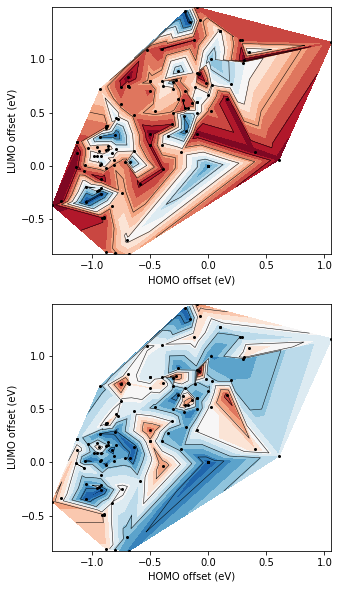

In [15]:
#plt.ylim(0,1)
plt.figure(figsize=(5,10))
plt.subplot(211)
plt.xlabel('HOMO offset (eV)')
plt.ylabel('LUMO offset (eV)')
plt.tricontour(-array[:,2]+array[:,0], -array[:,3]+array[:,1], array[:,29], levels=5, linewidths=0.5, colors='k')
cntr2 = plt.tricontourf(-array[:,2]+array[:,0], -array[:,3]+array[:,1], array[:,29], levels=14, cmap="RdBu_r")
plt.plot(-array[:,2]+array[:,0], -array[:,3]+array[:,1], 'ko', ms=2)

plt.subplot(212)
plt.xlabel('HOMO offset (eV)')
plt.ylabel('LUMO offset (eV)')
plt.tricontour(-array[:,2]+array[:,0], -array[:,3]+array[:,1], array[:,30], levels=5, linewidths=0.5, colors='k')
cntr2 = plt.tricontourf(-array[:,2]+array[:,0], -array[:,3]+array[:,1], array[:,30], levels=14, cmap="RdBu_r")
plt.plot(-array[:,2]+array[:,0], -array[:,3]+array[:,1], 'ko', ms=2)
plt.show()
#plt.savefig('contour.png', figsize=(6,4), dpi=300)

python array index starts from 0 not 1

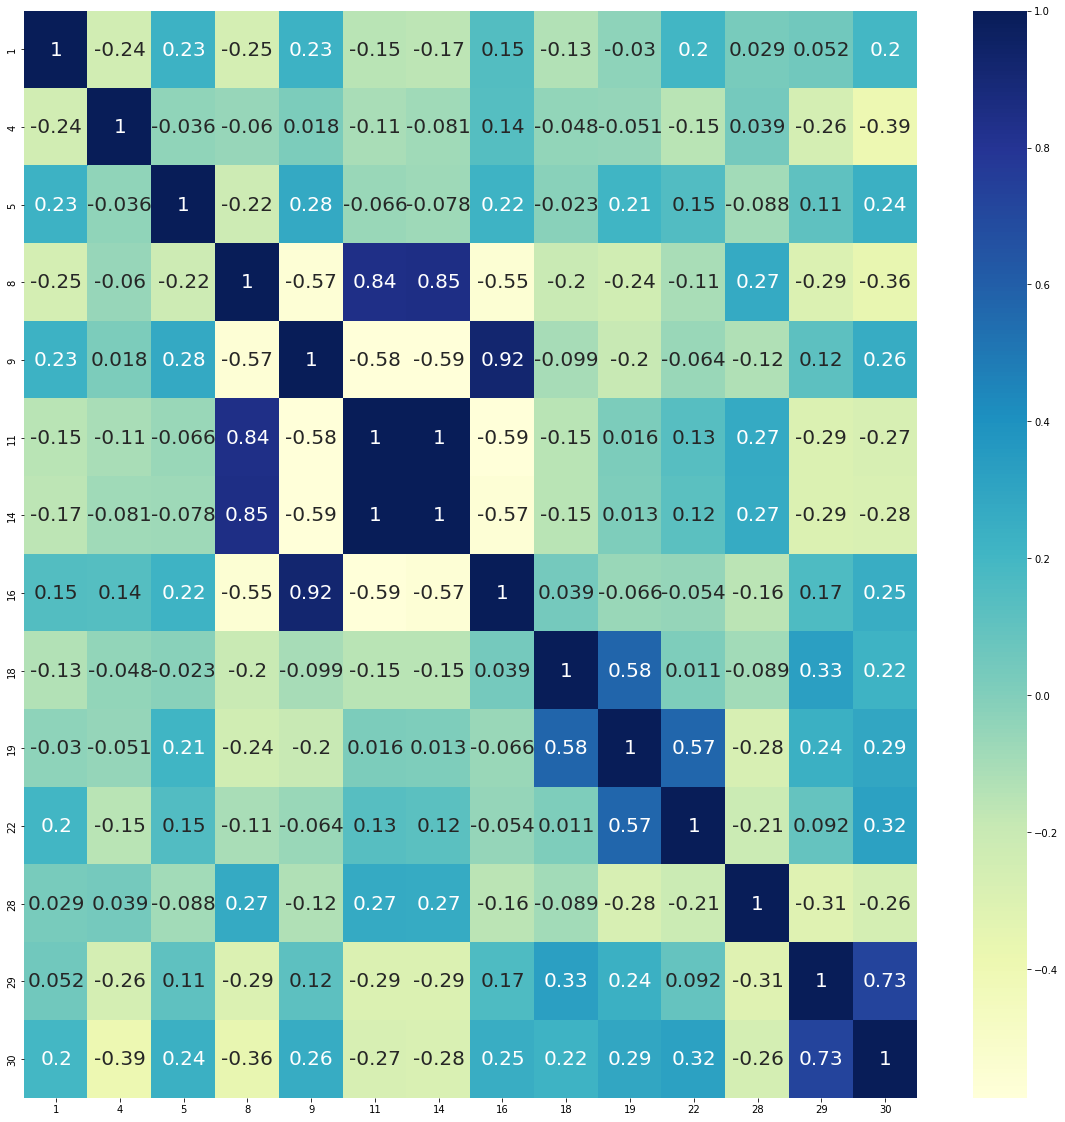

In [17]:
df1 = data.iloc[:, [1,4,5,8,9,11,14,16,18,19,22,28,29,30]]
plt.figure(figsize=(20,20))
sb.heatmap(df1.corr(), cmap='YlGnBu', annot=True, annot_kws={'size':20})
plt.savefig('correlation.png', figsize=(12,12), dpi=300, bbox_iches='tight')

PLQY

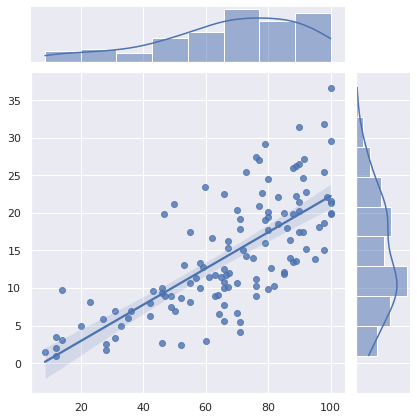

In [113]:
#plt.grid()
#plt.xlabel('PLQY')
#plt.ylabel('max. EQE')
sns.set_theme(style="darkgrid")
sns.jointplot(y=y,x=x[:,29],kind='reg')
#plt.savefig('EQE',dpi=300, figsize=(6,4))

singlet-triplet gap

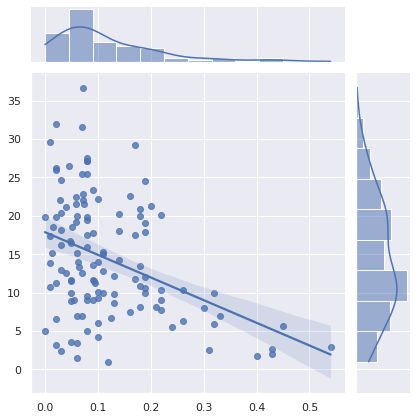

In [114]:
#plt.grid()
#plt.xlabel('singlet-triplet gap')
#plt.ylabel('max. EQE')
sns.jointplot(y=y,x=x[:,4],kind='reg')
plt.savefig('ST-gap',dpi=300, figsize=(6,4))


HTL1 LUMO (eV)




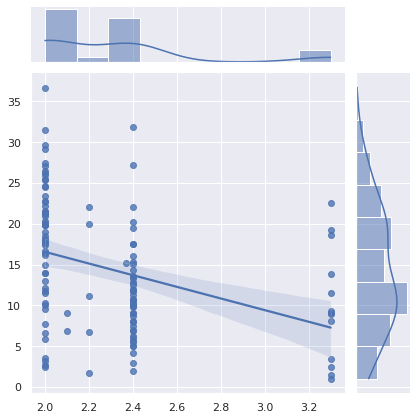

In [115]:
#plt.grid()
#plt.xlabel('HTL1 LUMO (eV)')
#plt.ylabel('max. EQE')
sns.jointplot(y=y,x=x[:,8],kind='reg')
plt.savefig('HTL1-lumo',dpi=300, figsize=(6,4))

ETL2 HOMO (eV)

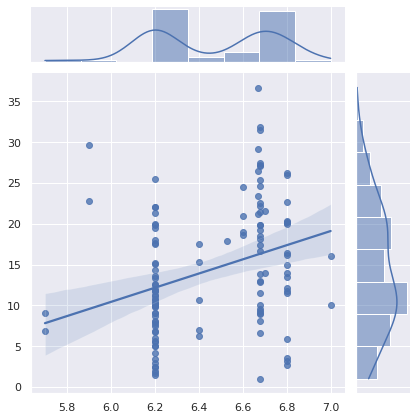

In [116]:
#plt.grid()
#plt.xlabel('ETL2 HOMO (eV)')
#plt.ylabel('max. EQE')
sns.jointplot(y=y,x=x[:,22],kind='reg')
plt.savefig('ETL-homo',dpi=300, figsize=(6,4))

##ML

importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import preprocessing
#from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Loading the dataset

python array indexing starts from 0 not from 1

In [20]:
EQE = pd.read_excel('dataset_ML.xlsx')
array = EQE.values
print(array.shape)
x = array[:,0:30]
y = array[:,30]

(123, 31)


##Support Vector Regression (SVR)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import svm

svr_rbf = svm.SVR(C=0.01, gamma=0.6, kernel='poly', degree=3)
svr_rbf.fit(X_train,Y_train)
svr_rbf_x_predict = svr_rbf.predict(X_train)
svr_rbf_y_predict = svr_rbf.predict(X_test)

r2_scores = cross_val_score(svr_rbf, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score on train set: ', round(r2_scores.mean(),2), '\n')
print('std R2 score on train set: ', round(r2_scores.std(),2), '\n')

rmse_scores = -cross_val_score(svr_rbf, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', round(rmse_scores.mean(),2))
print('RMSE std', round(rmse_scores.std(),2))

print('r2_score on test_dataset :',round(r2_score(Y_test, svr_rbf_y_predict),2))

print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, svr_rbf_y_predict)) ,2), '\n')


R2 scores:  [0.67184541 0.67638586 0.62163956 0.55897939]
mean R2 score on train set:  0.63 

std R2 score on train set:  0.05 

mean RMSE 4.72
RMSE std 0.41
r2_score on test_dataset : 0.34
RMSE for test dataset:  5.09 



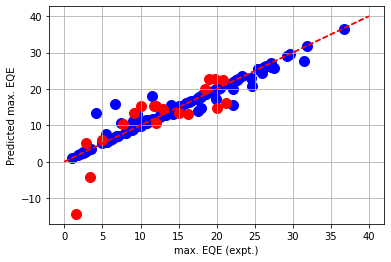

In [24]:
y_train_p = svr_rbf.predict(X_train)
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, svr_rbf_y_predict,s=100,c='r', label='test set')
plt.savefig('SVR_r2', dpi=300, figsize=(6,4))

learning curve

[ 7 15 23 31 39 46 54 62 70 78]
[-0.63062  0.05005  0.20685  0.36448  0.43969  0.47753  0.52888  0.55461
  0.63546  0.63221]
[0.99077 0.98416 0.96597 0.8865  0.91105 0.91357 0.92161 0.932   0.93661
 0.94221]


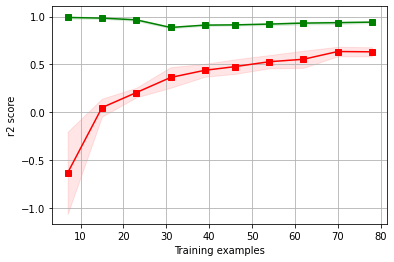

In [25]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = svr_rbf, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_RF = []
valid_score_RF = []
for i in range(0,train_sizes.shape[0]):
    train_score_RF = np.append(train_score_RF, np.mean(train_scores[i]))
    valid_score_RF = np.append(valid_score_RF, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

print(np.round(valid_score_RF,decimals = 5))
print(np.round(train_score_RF,decimals = 5))

plt.grid()
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_RF, 'sg-',label='Training Score')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_RF, 'sr-', label='Cross-Validation Score')
plt.savefig('SVR_lC.png',figsize=(6,4),dpi=300)
plt.show()

hyperparameter tuning for SVR

In [26]:
model = svm.SVR()

In [27]:
grid = dict()
grid['kernel'] = ['rbf']
grid['C'] = [0.01, 0.1, 1.0, 10.0, 100.0]
grid['gamma'] = [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9,10.0,100.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.577619 using {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}


In [28]:
grid = dict()
grid['kernel'] = ['poly']
grid['degree'] = [2, 3, 4, 5]
grid['C'] = [0.01, 0.1, 1.0, 10.0, 100.0]
grid['gamma'] = [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9, 10.0, 100.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.632213 using {'C': 0.01, 'degree': 3, 'gamma': 0.6, 'kernel': 'poly'}


##Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor(random_state=25)

hyperparameter tuning for DT

In [31]:
grid = dict()
grid['max_depth'] = [2, 3, 5, 10, 20]
grid['min_samples_leaf'] = [5, 10, 20, 50, 100]
#grid['criteron'] = ['gini','entropy']
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.409022 using {'max_depth': 2, 'min_samples_leaf': 20}


mean R2 score:  0.41 

std. R2 score:  0.15 

mean RMSE 5.99
RMSE std 1.05
Number of Test dataset : 19
RMSE for test dataset:  6.46 

R-squared test:  -0.06
[0.        0.        0.        0.        0.        0.        0.
 0.        0.1163095 0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.8836905]


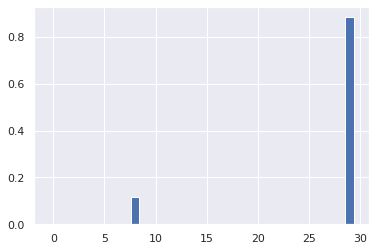

In [127]:
regressor = DecisionTreeRegressor(max_depth=2,min_samples_leaf=20)
regressor.fit(X_train, Y_train)
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X_train, Y_train, cv=4)
r2_scores_2 = np.round(r2_scores,decimals=2)
#print('R2 scores: ', np.round(r2_scores,decimals=2))
print('mean R2 score: ', round(r2_scores.mean(),2), '\n')
print('std. R2 score: ', round(r2_scores.std(),2), '\n')

rmse_scores = -cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', round(rmse_scores.mean(),2))
print('RMSE std', round(rmse_scores.std(),2))

print('Number of Test dataset :', Y_test.shape[0])
# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')


# Check how our model is doing on test set
print('R-squared test: ', round((regressor.score(X_test, Y_test)),2))
#print(Y_test)
print(regressor.feature_importances_)
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()
#plt.savefig('DTpi',dpi=300,figsize=(6,4))

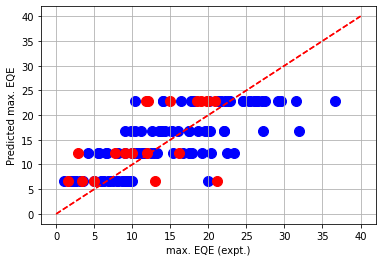

In [33]:
y_train_p = regressor.predict(X_train)
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
plt.savefig('DT_r2', dpi=300, figsize=(6,4))

##KNN Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer

n=2

In [35]:
knn1 = KNeighborsRegressor(n_neighbors=2)
knn1.fit(X_train, Y_train)
#y_predictions = knn1.predict(X_train)
y_predictions = knn1.predict(X_test)
r2_scores = cross_val_score(knn1, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')
print('std dev R2 score: ', r2_scores.std(), '\n')
rmse_scores = -cross_val_score(knn1, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', rmse_scores.mean())
print('RMSE std', rmse_scores.std())
print('test', knn1.score(X_test, Y_test))
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')

R2 scores:  [0.34221821 0.31942733 0.45836366 0.4262933 ]
mean R2 score:  0.38657562638382803 

std dev R2 score:  0.05746192045380683 

mean RMSE 6.096296809313872
RMSE std 0.43696926187825885
test 0.584949314864169
RMSE for test dataset:  4.04 



n=3

In [42]:
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train, Y_train)
#y_predictions = knn1.predict(X_train)
y_predictions = knn1.predict(X_test)
r2_scores = cross_val_score(knn1, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')
print('std dev R2 score: ', r2_scores.std(), '\n')
rmse_scores = -cross_val_score(knn1, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', rmse_scores.mean())
print('RMSE std', rmse_scores.std())
print('test', knn1.score(X_test, Y_test))
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')

R2 scores:  [0.34432187 0.43598002 0.4159812  0.37689749]
mean R2 score:  0.393295145942653 

std dev R2 score:  0.03536919690543143 

mean RMSE 6.080843742089552
RMSE std 0.5443788741761684
test 0.6176482741131195
RMSE for test dataset:  3.88 



n=4

In [38]:
knn1 = KNeighborsRegressor(n_neighbors=4)
knn1.fit(X_train, Y_train)
#y_predictions = knn1.predict(X_train)
y_predictions = knn1.predict(X_test)
r2_scores = cross_val_score(knn1, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')
print('std dev R2 score: ', r2_scores.std(), '\n')
rmse_scores = -cross_val_score(knn1, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', rmse_scores.mean())
print('RMSE std', rmse_scores.std())
print('test', knn1.score(X_test, Y_test))
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')

R2 scores:  [0.27417778 0.36368267 0.41967242 0.42542157]
mean R2 score:  0.37073861364611144 

std dev R2 score:  0.06074233221104828 

mean RMSE 6.187901020947804
RMSE std 0.6107982191923285
test 0.6628460611373621
RMSE for test dataset:  3.64 



n=5

In [39]:
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train, Y_train)
#y_predictions = knn1.predict(X_train)
y_predictions = knn1.predict(X_test)
r2_scores = cross_val_score(knn1, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')
print('std dev R2 score: ', r2_scores.std(), '\n')
rmse_scores = -cross_val_score(knn1, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', rmse_scores.mean())
print('RMSE std', rmse_scores.std())
print('test', knn1.score(X_test, Y_test))
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')

R2 scores:  [0.21940162 0.40129461 0.37583181 0.38482041]
mean R2 score:  0.345337115646579 

std dev R2 score:  0.07328002374158878 

mean RMSE 6.319420787965427
RMSE std 0.7340684709310311
test 0.6554697180938337
RMSE for test dataset:  3.68 



neighbour setting vs r2 score

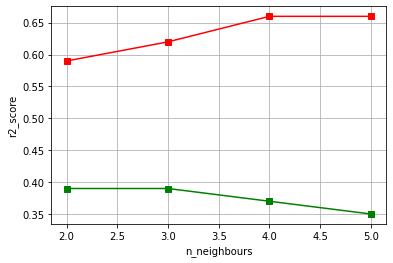

In [41]:
N = [2, 3, 4, 5]
train = [0.39, 0.39, 0.37, 0.35]
test = [0.59, 0.62, 0.66, 0.66]

plt.grid()
plt.ylabel('r2_score')
plt.xlabel('n_neighbours')
plt.plot(N, train, 'gs-')
plt.plot(N, test, 'rs-')
#plt.savefig('kNN_hy', figsize=(6,4), dpi=300)
plt.show()

with n_neighbors=3

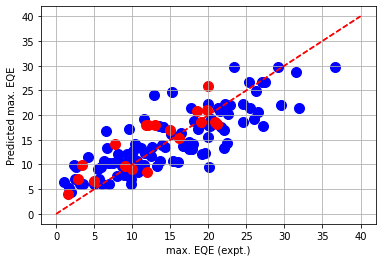

In [43]:
y_train_p = knn1.predict(X_train)
y_predictions = knn1.predict(X_test)
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
plt.savefig('KNN_r2', dpi=300, figsize=(6,4))

##AdaBoost

R2 scores:  [0.48247048 0.72252101 0.68132808 0.52997657]
mean R2 score:  0.6 

std. dev. of R2 score:  0.1 

mean RMSE 4.892394166408221
RMSE std 0.8579895495203171
RMSE for test dataset:  3.75 

R-squared test:  0.64
[0.0246372  0.05133736 0.00395772 0.02009934 0.04114943 0.01137946
 0.00856572 0.00632145 0.03936312 0.02301691 0.00182863 0.00599253
 0.00525175 0.00186687 0.00433453 0.00055002 0.01899525 0.00949391
 0.01024368 0.02096275 0.01263482 0.00156471 0.04176701 0.0197678
 0.01389443 0.01104325 0.00232524 0.02130471 0.06897524 0.49737514]


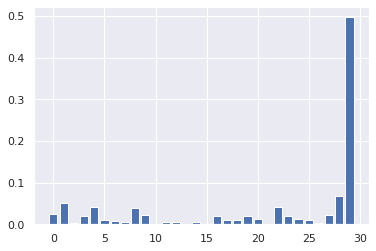

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(n_estimators=399, learning_rate=1.0, random_state=25)
regressor.fit(X_train, Y_train)
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', round(r2_scores.mean(),2), '\n')
print('std. dev. of R2 score: ', round(r2_scores.std(),2),'\n')
rmse_scores = -cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', rmse_scores.mean())
print('RMSE std', rmse_scores.std())

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')
# Check how our model is doing on test set
print('R-squared test: ', round(regressor.score(X_test, Y_test),2))
#print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print(regressor.feature_importances_)
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()
#plt.savefig('adaboostpi',figsize=(6,4),dpi=300)

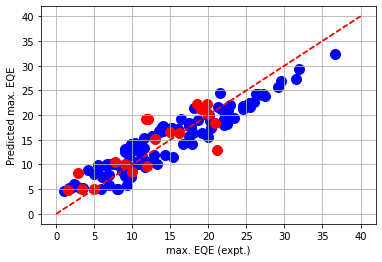

In [58]:
y_train_p = regressor.predict(X_train)
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
#plt.savefig('AdaBoost_r2', dpi=300, figsize=(6,4))
plt.show()

learning curve for AdaBoost

[ 7 15 23 31 39 46 54 62 70 78]
[-0.71218  0.22964  0.45857  0.4718   0.48394  0.5125   0.52612  0.58621
  0.56438  0.60407]
[1.      0.99268 0.98251 0.96265 0.95308 0.9417  0.92281 0.91561 0.91032
 0.90059]


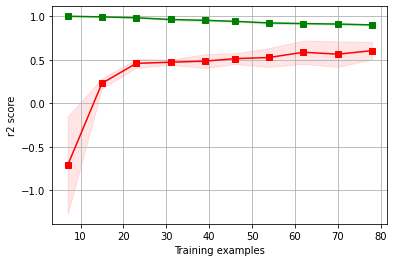

In [59]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_AdaBoost = []
valid_score_AdaBoost = []
for i in range(0,train_sizes.shape[0]):
    train_score_AdaBoost = np.append(train_score_AdaBoost, np.mean(train_scores[i]))
    valid_score_AdaBoost = np.append(valid_score_AdaBoost, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

print(np.round(valid_score_AdaBoost,decimals = 5))
print(np.round(train_score_AdaBoost,decimals = 5))
#csfont = {'fontname': 'Times New Roman'}
#plt.ylim(-1.5,1.0)
#plt.figure(figsize=(6,4),dpi=300)
plt.grid()
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_AdaBoost, 'sg-')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_AdaBoost, 'sr-')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
#plt.savefig('AdaBoost_lC.png',figsize=(6,4),dpi=300)
plt.show()

hyperparameter tuning for AdaBoost

In [49]:
model = AdaBoostRegressor(random_state=25)

In [50]:
grid = dict()
grid['n_estimators'] = [50, 100, 150, 200, 250, 300, 350, 400, 450]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.604072 using {'learning_rate': 1.0, 'n_estimators': 400}


In [51]:
grid = dict()
grid['n_estimators'] = [390,395,400,405,410]
grid['learning_rate'] = [ 1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.604072 using {'learning_rate': 1.0, 'n_estimators': 400}


In [54]:
grid = dict()
grid['n_estimators'] = [398,399,400,401,402]
grid['learning_rate'] = [1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.604074 using {'learning_rate': 1.0, 'n_estimators': 399}


##Gradient Boost

R2 scores:  [0.66300157 0.77335064 0.71769332 0.67792289]
mean R2 score:  0.71 

std. dev. of R2 score:  0.04 

mean RMSE 4.22
RMSE std 0.55
RMSE for test dataset:  2.53 

R-squared test:  0.84
[3.53413292e-02 7.26152856e-02 2.18771003e-03 9.34651962e-04
 5.40131793e-02 1.74371417e-03 4.64013086e-03 2.96978306e-03
 3.69503875e-02 2.45290399e-02 5.29247853e-03 2.77309108e-02
 1.86664721e-04 3.93667680e-04 5.41805544e-04 9.23846496e-04
 5.49590461e-03 1.45715777e-02 4.33524160e-03 4.53279234e-04
 5.23826757e-02 5.17980206e-05 3.89792459e-02 1.52124554e-02
 1.13828870e-02 1.51111702e-03 7.00792360e-03 6.09035268e-03
 3.44420560e-02 5.37088900e-01]


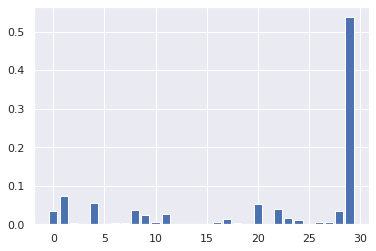

In [124]:
x = array[:,0:30]
y = array[:,30]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = GradientBoostingRegressor(learning_rate= 0.2, max_depth= 20, min_samples_split= 0.5, n_estimators= 150, random_state=25)
regressor.fit(X_train, Y_train)
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', round(r2_scores.mean(),2), '\n')
print('std. dev. of R2 score: ', round(r2_scores.std(),2),'\n')
rmse_scores = -cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', round(rmse_scores.mean(),2))
print('RMSE std', round(rmse_scores.std(),2))

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')
# Check how our model is doing on test set
print('R-squared test: ', round(regressor.score(X_test, Y_test),2))
#print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print(regressor.feature_importances_)
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()
#plt.savefig('gboostpi',figsize=(6,4),dpi=300)

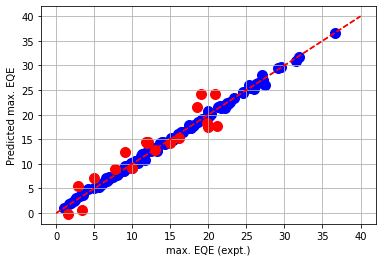

In [68]:
y_train_p = regressor.predict(X_train)
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
plt.savefig('train_test_r2_score_GB', dpi=300, figsize=(6,4))

learning curve

[ 7 15 23 31 39 46 54 62 70 78]
[-1.42753  0.30682  0.36823  0.4758   0.4345   0.48364  0.54862  0.63482
  0.64747  0.70799]
[1.      1.      1.      1.      0.99999 0.99998 0.99993 0.99977 0.99954
 0.99927]


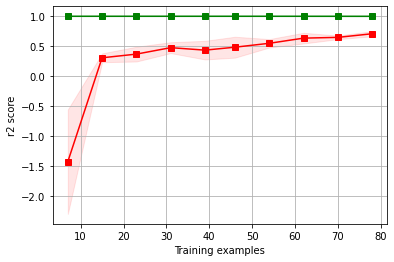

In [69]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_XGBoost = []
valid_score_XGBoost = []
for i in range(0,train_sizes.shape[0]):
    train_score_XGBoost = np.append(train_score_XGBoost, np.mean(train_scores[i]))
    valid_score_XGBoost = np.append(valid_score_XGBoost, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

print(np.round(valid_score_XGBoost,decimals = 5))
print(np.round(train_score_XGBoost,decimals = 5))
#csfont = {'fontname': 'Times New Roman'}
#plt.ylim(-1.5,1.0)
#plt.figure(figsize=(6,4),dpi=300)
plt.grid()
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_XGBoost, 'sg-',label='Training Score')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_XGBoost, 'sr-', label='Cross-Validation Score')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
#plt.savefig('GBoost_lC.png',figsize=(6,4),dpi=300)
plt.show()

[ 7 15 23 31 39 46 54 62 70 78]


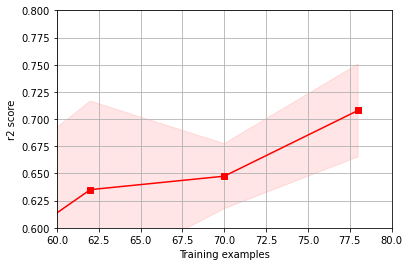

In [63]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_XGBoost = []
valid_score_XGBoost = []
for i in range(0,train_sizes.shape[0]):
    train_score_XGBoost = np.append(train_score_XGBoost, np.mean(train_scores[i]))
    valid_score_XGBoost = np.append(valid_score_XGBoost, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

#print(np.round(valid_score_XGBoost,decimals = 2))
#print(np.round(train_score_XGBoost,decimals = 2))
#csfont = {'fontname': 'Times New Roman'}
plt.grid()
plt.xlim(60,80)
plt.ylim(0.6,0.8)
#plt.figure(figsize=(4,4),dpi=300)
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_XGBoost, 'sg-')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_XGBoost, 'sr-')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
#plt.savefig('GBoost_lC_HR.png',figsize=(4,4),dpi=300)
plt.show()

hyperparameter tuning

In [65]:
model = GradientBoostingRegressor()

In [66]:
grid = dict()
grid['n_estimators'] = [50, 100, 150, 200, 250, 300, 350, 400, 450]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
grid['max_depth']=[2,3,5,10,20]
grid['min_samples_split'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#grid['min_leaf_split'] = [0.1, 0.2, 0.3, 0.4, 0.5]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.712539 using {'learning_rate': 0.2, 'max_depth': 20, 'min_samples_split': 0.5, 'n_estimators': 150}


##XGBoost

mean R2 score:  0.7 

std. R2 score:  0.03 

[4.95006062 3.89858508 4.53312969 3.83193302]
[0.65549444 0.69536043 0.68796941 0.74482278]
mean RMSE 4.3034271029176985
RMSE std 0.4628989920948431
Number of Test dataset : 19
RMSE for test dataset:  3.44 

R-squared test:  0.7
[0.01153954 0.01482619 0.00209517 0.01758877 0.03060255 0.01010458
 0.0009384  0.         0.10432984 0.0169857  0.0017455  0.03502432
 0.00207564 0.01088029 0.         0.00488249 0.04887876 0.01102975
 0.02668449 0.00877164 0.08289875 0.0008033  0.09718524 0.00512238
 0.01584352 0.0374596  0.07802379 0.04009799 0.03095854 0.2526233 ]


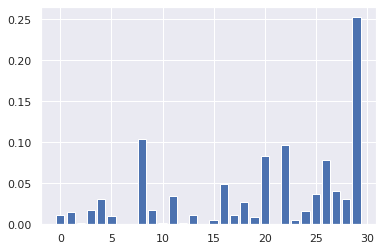

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from xgboost import XGBRegressor, plot_importance

regressor = XGBRegressor(objective ='reg:squarederror',booster = 'gbtree', max_depth=3, learning_rate=0.2, n_estimators=90, min_leaf_split=0.1, min_samples_split=0.1, reg_alpha=7.66e-2, reg_lambda=1.0)
regressor.fit(X_train, Y_train)
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X_train, Y_train, cv=4)
r2_scores_2 = np.round(r2_scores,decimals=2)
rmse_scores = -cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
mae1 = cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_mean_absolute_error')
#print('R2 scores: ', np.round(r2_scores,decimals=2))
print('mean R2 score: ', round(r2_scores.mean(),2), '\n')
print('std. R2 score: ', round(r2_scores.std(),2), '\n')
print(rmse_scores)
print(r2_scores)
print('mean RMSE', rmse_scores.mean())
print('RMSE std', rmse_scores.std())
#print('mae avg.',mae1.mean())

print('Number of Test dataset :', Y_test.shape[0])
# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')


# Check how our model is doing on test set
print('R-squared test: ', round((regressor.score(X_test, Y_test)),2))
#print('MAE test: ', round((mean_absolute_error(Y_test, y_predictions)),2))
#print(Y_test)
print(regressor.feature_importances_)
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()
#plt.savefig('plot_importance_XGB',figsize=(6,4),dpi=300)

In [83]:
y_train_p = regressor.predict(X_train)

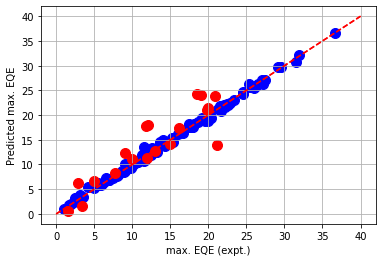

In [84]:
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
plt.savefig('train_test_r2_score', dpi=300, figsize=(6,4))

learning curve

[ 7 15 23 31 39 46 54 62 70 78]
[-1.37008  0.16777  0.4135   0.45106  0.50284  0.52779  0.53781  0.58321
  0.65898  0.69553]
[0.99998 0.99997 0.99998 0.99997 0.99994 0.99983 0.99968 0.99955 0.99912
 0.99898]


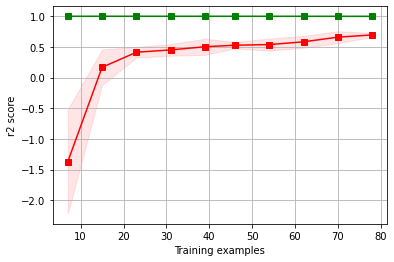

In [73]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_XGBoost = []
valid_score_XGBoost = []
for i in range(0,train_sizes.shape[0]):
    train_score_XGBoost = np.append(train_score_XGBoost, np.mean(train_scores[i]))
    valid_score_XGBoost = np.append(valid_score_XGBoost, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

print(np.round(valid_score_XGBoost,decimals = 5))
print(np.round(train_score_XGBoost,decimals = 5))
#csfont = {'fontname': 'Times New Roman'}
#plt.ylim(-1.5,1.0)
#plt.figure(figsize=(6,4),dpi=300)
plt.grid()
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_XGBoost, 'sg-',label='Training Score')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_XGBoost, 'sr-', label='Cross-Validation Score')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
plt.savefig('XGBoost_lC.png',figsize=(6,4),dpi=300)

[ 7 15 23 31 39 46 54 62 70 78]


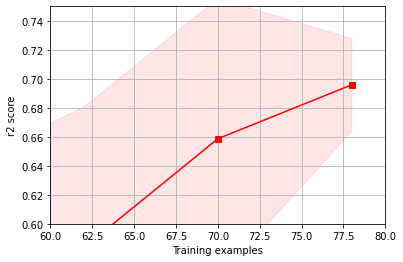

In [85]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_XGBoost = []
valid_score_XGBoost = []
for i in range(0,train_sizes.shape[0]):
    train_score_XGBoost = np.append(train_score_XGBoost, np.mean(train_scores[i]))
    valid_score_XGBoost = np.append(valid_score_XGBoost, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

#print(np.round(valid_score_XGBoost,decimals = 2))
#print(np.round(train_score_XGBoost,decimals = 2))
#csfont = {'fontname': 'Times New Roman'}
plt.grid()
plt.xlim(60,80)
plt.ylim(0.6,0.75)
#plt.figure(figsize=(4,4),dpi=300)
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_XGBoost, 'sg-')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_XGBoost, 'sr-')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
#plt.savefig('XGBoost_lC_HR.png',figsize=(4,4),dpi=300)
plt.show()

hyperparameter tuning

In [74]:
model = XGBRegressor(objective ='reg:squarederror')

In [75]:
grid = dict()
grid['n_estimators'] = [50, 100, 150, 200, 250]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.0]
grid['boosting_type'] = ['gbtree','dart','gblinear']
grid['reg_alpha'] = [0.001, 0.01, 0.1, 1.0, 10.0]
grid['reg_lambda'] = [0.001, 0.01, 0.1, 1.0, 10.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.681000 using {'boosting_type': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 150, 'reg_alpha': 0.001, 'reg_lambda': 1.0}


In [76]:
grid = dict()
grid['n_estimators'] = [140, 150, 160]
grid['learning_rate'] = [ 0.15, 0.2, 0.25]
grid['boosting_type'] = ['gbtree','dart','gblinear']
grid['reg_alpha'] = [0.0005, 0.001, 0.005]
grid['reg_lambda'] = [0.9,1.0,1.1]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.681238 using {'boosting_type': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 160, 'reg_alpha': 0.0005, 'reg_lambda': 1.0}


In [77]:
grid = dict()
grid['n_estimators'] = [90,95,100,105,110]
grid['learning_rate'] = [ 0.1, 0.15, 0.2, 0.25]
grid['boosting_type'] = ['gbtree','dart','gblinear']
grid['reg_alpha'] = [0.06, 0.0775, 0.08]
grid['reg_lambda'] = [ 0.09, 1.0, 2.0, 3.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.695908 using {'boosting_type': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 90, 'reg_alpha': 0.0775, 'reg_lambda': 1.0}


In [78]:
grid = dict()
grid['n_estimators'] = [88,89,90,91,92]
grid['learning_rate'] = [ 0.19, 0.2, 0.21]
grid['boosting_type'] = ['gbtree','dart','gblinear']
grid['reg_alpha'] = [0.077, 0.0775, 0.078]
grid['reg_lambda'] = [ 1.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.695910 using {'boosting_type': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 90, 'reg_alpha': 0.077, 'reg_lambda': 1.0}


In [79]:
grid = dict()
grid['n_estimators'] = [88,89,90,91,92]
grid['learning_rate'] = [ 0.19, 0.2, 0.21]
grid['boosting_type'] = ['gbtree','dart','gblinear']
grid['reg_alpha'] = [0.076, 0.0765, 0.077]
grid['reg_lambda'] = [ 1.0]
grid['max_depth'] = [3, 4, 5]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.695910 using {'boosting_type': 'gbtree', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 90, 'reg_alpha': 0.077, 'reg_lambda': 1.0}


In [80]:
grid = dict()
grid['n_estimators'] = [88,89,90,91,92]
grid['learning_rate'] = [ 0.19, 0.2, 0.21]
grid['boosting_type'] = ['gbtree']
grid['reg_alpha'] = [0.0766, 0.0767, 0.0768, 0.0769, 0.077, 0.0771, 0.0772]
grid['reg_lambda'] = [ 1.0]
grid['max_depth'] = [3, 4, 5]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.695912 using {'boosting_type': 'gbtree', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 90, 'reg_alpha': 0.0766, 'reg_lambda': 1.0}


In [81]:
grid = dict()
grid['n_estimators'] = [50, 90, 100, 150, 200, 250, 300, 350, 400, 450]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
grid['max_depth']=[2,3,5,10,20]
grid['min_samples_split'] = [0.1, 0.2, 0.5, 1.0]
grid['min_leaf_split'] = [0.1, 0.2, 0.3, 0.4, 0.5]
grid['reg_alpha'] = [0.0766]
grid['reg_lambda'] = [ 1.0,2.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.695912 using {'learning_rate': 0.2, 'max_depth': 3, 'min_leaf_split': 0.1, 'min_samples_split': 0.1, 'n_estimators': 90, 'reg_alpha': 0.0766, 'reg_lambda': 1.0}


##LightGBM

R2 scores:  [0.55972269 0.66447283 0.66613313 0.6342564 ]
mean R2 score:  0.63 

std. R2 score:  0.04 

mean RMSE 4.74
RMSE std 0.54
R-squared test:  0.61
RMSE for test dataset:  3.91 

[ 9 39  5  5 24  0  4  3  7  5  1  0  3  5  0  0 18  3 20 18  8  2 16  2
 12  7  0  3 15 45]


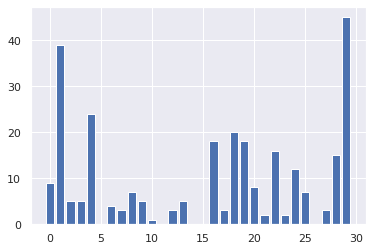

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from lightgbm import LGBMRegressor

regressor = LGBMRegressor(boosting_type='gbdt', max_depth=3, learning_rate=0.2, n_estimators=90, reg_alpha=0.02, reg_lambda=1.0)
regressor.fit(X_train, Y_train)
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X_train, Y_train, cv=4)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', round(r2_scores.mean(),2), '\n')
print('std. R2 score: ', round(r2_scores.std(),2), '\n')

rmse_scores = -cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', round(rmse_scores.mean(),2))
print('RMSE std', round(rmse_scores.std(),2))

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', round((regressor.score(X_test, Y_test)),2))
#print('RMSE: ', round(r2_score(Y_test, y_predictions),5))
print('RMSE for test dataset: ', round(math.sqrt(mean_squared_error(Y_test, y_predictions)) ,2), '\n')
#print(Y_test)
#print(Y_test.shape)
print(regressor.feature_importances_)
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()
#plt.savefig('LighGBMpi',figsize=(6,4),dpi=300)

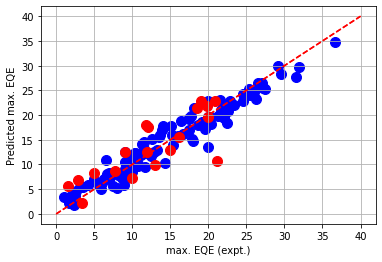

In [88]:
y_train_p = regressor.predict(X_train)
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
#plt.xlabel('max. EQE (expt.)')
#plt.ylabel('Predicted max. EQE')
#plt.grid()
#xlin = np.linspace(0,25,100)
#ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
#plt.savefig('LighGBM_r2', dpi=300, figsize=(6,4))
plt.show()

[ 7 15 23 31 39 46 54 62 70 78]
[-0.85488 -0.30379 -0.11584 -0.08337 -0.07147  0.44665  0.53291  0.56782
  0.58774  0.63115]
[-0.      -0.      -0.      -0.      -0.       0.74719  0.77175  0.79836
  0.87653  0.88847]


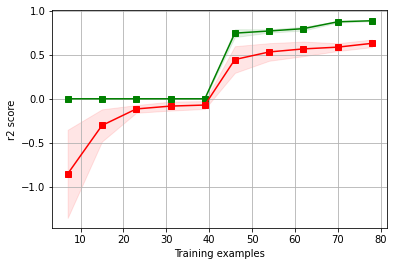

In [89]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_LightBoost = []
valid_score_LightBoost = []
for i in range(0,train_sizes.shape[0]):
    train_score_LightBoost = np.append(train_score_LightBoost, np.mean(train_scores[i]))
    valid_score_LightBoost = np.append(valid_score_LightBoost, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

print(np.round(valid_score_LightBoost,decimals = 5))
print(np.round(train_score_LightBoost,decimals = 5))
#csfont = {'fontname': 'Times New Roman'}
#plt.ylim(-1.5,1.0)
#plt.figure(figsize=(6,4),dpi=300)
plt.grid()
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_LightBoost, 'sg-')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_LightBoost, 'sr-')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
#plt.savefig('LightBoost_lC.png',figsize=(6,4),dpi=300)
plt.show()

hyperparameter tuning for LightGBM

In [90]:
model = LGBMRegressor()

In [91]:
grid = dict()
grid['n_estimators'] = [50, 100, 150, 200, 250, 300, 350, 400, 450]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['boosting_type'] = ['gbdt','dart','goss']
grid['reg_alpha'] = [0.001, 0.01, 0.1, 1.0, 10.0]
grid['reg_lambda'] = [0.001, 0.01, 0.1, 1.0, 10.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.608772 using {'boosting_type': 'dart', 'learning_rate': 0.1, 'n_estimators': 450, 'reg_alpha': 0.001, 'reg_lambda': 0.01}


In [92]:
grid = dict()
grid['n_estimators'] = [50, 100, 150, 200, 250, 300, 350, 400, 450]
grid['learning_rate'] = [0.1, 0.15, 0.2, 0.25, 0.35, 0.45, 0.5, 1.0]
grid['boosting_type'] = ['gbdt','dart','goss']
grid['reg_alpha'] = [0.001, 0.01, 0.1, 1.0, 10.0]
grid['reg_lambda'] = [0.001, 0.01, 0.1, 1.0, 10.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.627752 using {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 1.0}


In [93]:
grid = dict()
grid['n_estimators'] = [90, 95, 100, 105, 110]
grid['learning_rate'] = [0.15,  0.175,  0.20, 0.225, 0.25]
grid['boosting_type'] = ['gbdt','dart','goss']
grid['reg_alpha'] = [0.0075, 0.01, 0.125]
grid['reg_lambda'] = [0.5, 1.0, 5.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.631137 using {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'n_estimators': 90, 'reg_alpha': 0.01, 'reg_lambda': 1.0}


In [94]:
grid = dict()
grid['n_estimators'] = [87,88,89,90,91,92,93]
grid['learning_rate'] = [0.15,  0.175,  0.20, 0.225, 0.25]
grid['boosting_type'] = ['gbdt','dart','goss']
grid['reg_alpha'] = [0.0090, 0.01, 0.011]
grid['reg_lambda'] = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,3.0, 4.0,5.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.631138 using {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'n_estimators': 90, 'reg_alpha': 0.011, 'reg_lambda': 1.0}


In [95]:
grid = dict()
grid['n_estimators'] = [90]
grid['learning_rate'] = [0.2]
grid['boosting_type'] = ['gbdt']
grid['reg_alpha'] = [0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.020]
grid['reg_lambda'] = [0.9, 1.0, 1.1]
grid['max_depth'] = [3, 4, 5, 6]


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.631146 using {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 90, 'reg_alpha': 0.02, 'reg_lambda': 1.0}


In [96]:
grid = dict()
grid['n_estimators'] = [90]
grid['learning_rate'] = [0.2]
grid['boosting_type'] = ['gbdt']
grid['reg_alpha'] = [0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.1]
grid['reg_lambda'] = [0.9, 1.0, 1.1]
grid['max_depth'] = [3, 4, 5, 6]


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.631146 using {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 90, 'reg_alpha': 0.02, 'reg_lambda': 1.0}


##Random Forest (RF)

R2 scores:  [0.74748896 0.79607995 0.4917558  0.60502259]
mean R2 score:  0.66 

std. dev. R2 score:  0.12 

mean RMSE 4.62
RMSE std 0.39
R-squared test:  0.74
RMSE:  3.21
[0.04489601 0.05980359 0.01068013 0.0155306  0.10224373 0.01339436
 0.01929434 0.01883003 0.0479179  0.03715935 0.01237189 0.01848771
 0.0101969  0.0107172  0.01147704 0.00161992 0.02632608 0.01413164
 0.02076087 0.02442499 0.02150901 0.00625925 0.04540726 0.02290952
 0.01571196 0.01974187 0.00495792 0.01220947 0.03440036 0.29662909]


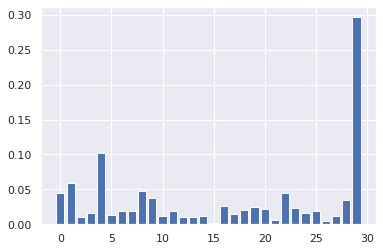

In [126]:
x = array[:,0:30]
y = array[:,30]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=500,random_state=0)
regressor.fit(X_train, Y_train)
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=4, shuffle=True, random_state=50)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X_train, Y_train, cv=kfold)
r2_scores = cross_val_score(regressor, x, y, cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', round(r2_scores.mean(),2), '\n')
print('std. dev. R2 score: ', round(r2_scores.std(),2), '\n')

rmse_scores = -cross_val_score(regressor, X_train, Y_train, cv=4, scoring='neg_root_mean_squared_error')
print('mean RMSE', round(rmse_scores.mean(),2))
print('RMSE std', round(rmse_scores.std(),2))

#mse_scores = cross_val_score(regressor, X_train, Y_train, cv=loo, scoring='neg_mean_squared_error')
#print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', round(regressor.score(X_test, Y_test),2))
print('RMSE: ', round(np.sqrt(mean_squared_error(Y_test, y_predictions)),2))
#print(Y_test)
print(regressor.feature_importances_)
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()
#plt.savefig('RFpi',figsize=(6,4),dpi=300)

In [100]:
y_train_p = regressor.predict(X_train)

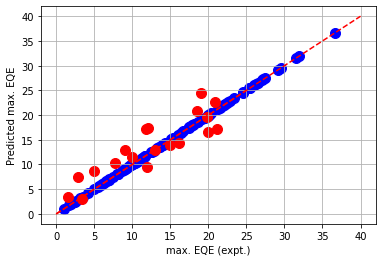

In [101]:
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
plt.grid()
xlin = np.linspace(0,40,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_train, y_train_p,s=100,c='b',label='train set')
plt.xlabel('max. EQE (expt.)')
plt.ylabel('Predicted max. EQE')
#plt.grid()
xlin = np.linspace(0,25,100)
ylin = xlin
plt.plot(xlin,ylin,'r--')
plt.scatter(Y_test, y_predictions,s=100,c='r', label='test set')
plt.savefig('RF_test', dpi=300, figsize=(6,4))

learning curve

[ 7 15 23 31 39 46 54 62 70 78]
[-0.62924  0.23228  0.23858  0.39922  0.45018  0.50565  0.49651  0.60457
  0.63497  0.64929]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


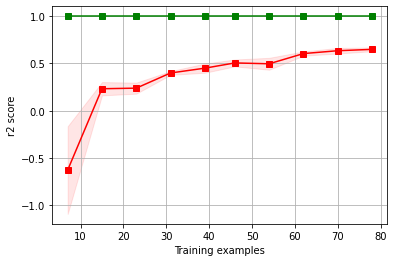

In [102]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = regressor, 
                                           X = X_train, y = Y_train, train_sizes =np.linspace(.1, 1.0, 10), cv = 4)
print(train_sizes)
train_score_RF = []
valid_score_RF = []
for i in range(0,train_sizes.shape[0]):
    train_score_RF = np.append(train_score_RF, np.mean(train_scores[i]))
    valid_score_RF = np.append(valid_score_RF, np.mean(validation_scores[i]))

train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
valid_score_mean = np.mean(validation_scores, axis=1)
valid_score_std = np.std(validation_scores, axis=1)

print(np.round(valid_score_RF,decimals = 5))
print(np.round(train_score_RF,decimals = 5))
#csfont = {'fontname': 'Times New Roman'}
#plt.ylim(-1.5,1.0)
#plt.figure(figsize=(6,4),dpi=300)
plt.grid()
plt.xlabel('Training examples')
plt.ylabel('r2 score')
plt.plot(train_sizes, train_score_RF, 'sg-',label='Training Score')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.1,color='g')
plt.fill_between(train_sizes, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.1,color='r')
plt.plot(train_sizes, valid_score_RF, 'sr-', label='Cross-Validation Score')
#plt.plot(train_sizes, valid_score, 'C3', lw=3)
#plt.scatter(train_sizes, valid_score, s=120, c='black',zorder=2.5)
#plt.savefig('RF_lC.png',figsize=(6,4),dpi=300)
plt.show()

hyperparameter tuning

In [103]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [104]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [105]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

{'n_estimators': [300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 400, 500]},
                   random_state=42, verbose=2)

In [106]:
rf_random.best_params_, rf_random.best_score_

({'bootstrap': False,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500},
 0.6605908768525227)

In [107]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [490,500,510]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,5,7,20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

{'n_estimators': [490, 500, 510], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 7, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [490, 500, 510]},
                   random_state=42, verbose=2)

In [108]:
rf_random.best_params_, rf_random.best_score_

({'bootstrap': False,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500},
 0.6616669450898998)